## Loading Dataset

In [21]:
df=pd.read_csv(r"C:\Users\asus\INeuron\Pandas Analysis\train_loan_prediction.csv")

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001259,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Missing Values

In [43]:
# df.isnull().sum().sort_values(ascending=False)
# df.dtypes.sort_values(ascending=False)
pd.concat([df.dtypes,df.isnull().sum()],axis=1,keys=("DataTypes","Missing_Values"))

,DataTypes,Missing_Values
Loan_ID,object,0
Gender,object,13
Married,object,3
Dependents,object,15
Education,object,0
Self_Employed,object,32
ApplicantIncome,int64,0
CoapplicantIncome,float64,0
LoanAmount,float64,22
Loan_Amount_Term,float64,14


In [44]:
## Filling Missing valuee for numerical variable -- mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [45]:
# df.isnull().sum().sort_values(ascending=False)
# df.dtypes.sort_values(ascending=False)
pd.concat([df.dtypes,df.isnull().sum()],axis=1,keys=("DataTypes","Missing_Values"))

,DataTypes,Missing_Values
Loan_ID,object,0
Gender,object,13
Married,object,3
Dependents,object,15
Education,object,0
Self_Employed,object,32
ApplicantIncome,int64,0
CoapplicantIncome,float64,0
LoanAmount,float64,0
Loan_Amount_Term,float64,14


In [46]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [47]:
# df.isnull().sum().sort_values(ascending=False)
# df.dtypes.sort_values(ascending=False)
pd.concat([df.dtypes,df.isnull().sum()],axis=1,keys=("DataTypes","Missing_Values"))

,DataTypes,Missing_Values
Loan_ID,object,0
Gender,object,13
Married,object,3
Dependents,object,15
Education,object,0
Self_Employed,object,32
ApplicantIncome,int64,0
CoapplicantIncome,float64,0
LoanAmount,float64,0
Loan_Amount_Term,float64,0


In [56]:
df['Gender'].dropna().mode().values[0]

'Male'

In [57]:
## Fill the missing values of categorical variables

In [60]:
cat_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtypes=='O']
for feature in cat_nan:
    df[feature].fillna(df[feature].dropna().mode().values[0],inplace=True)

In [61]:
pd.concat([df.dtypes,df.isnull().sum()],axis=1,keys=("DataTypes","Missing_Values"))

,DataTypes,Missing_Values
Loan_ID,object,0
Gender,object,0
Married,object,0
Dependents,object,0
Education,object,0
Self_Employed,object,0
ApplicantIncome,int64,0
CoapplicantIncome,float64,0
LoanAmount,float64,0
Loan_Amount_Term,float64,0


## Exploratory Data analysis

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

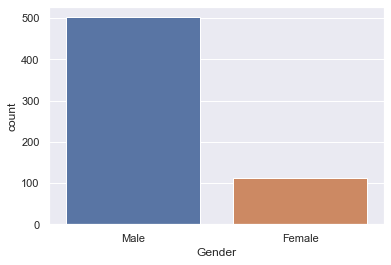

In [62]:
sns.countplot(df['Gender'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

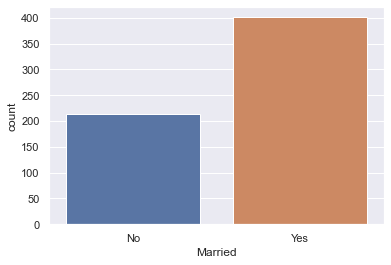

In [63]:
sns.countplot(df['Married'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

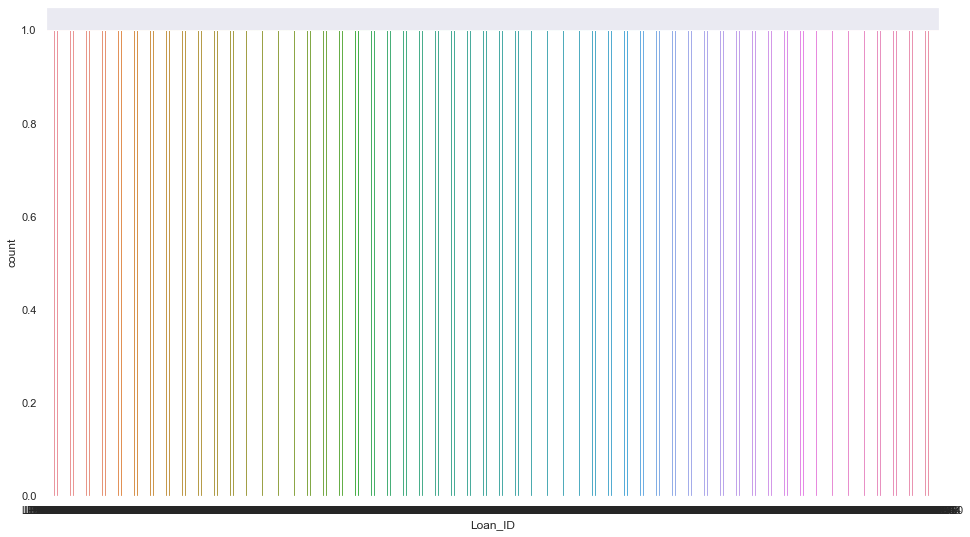

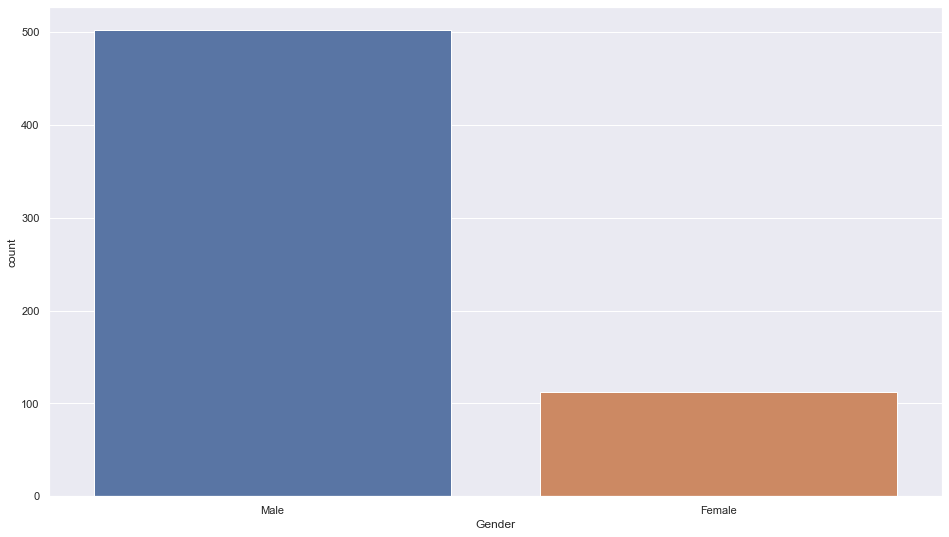

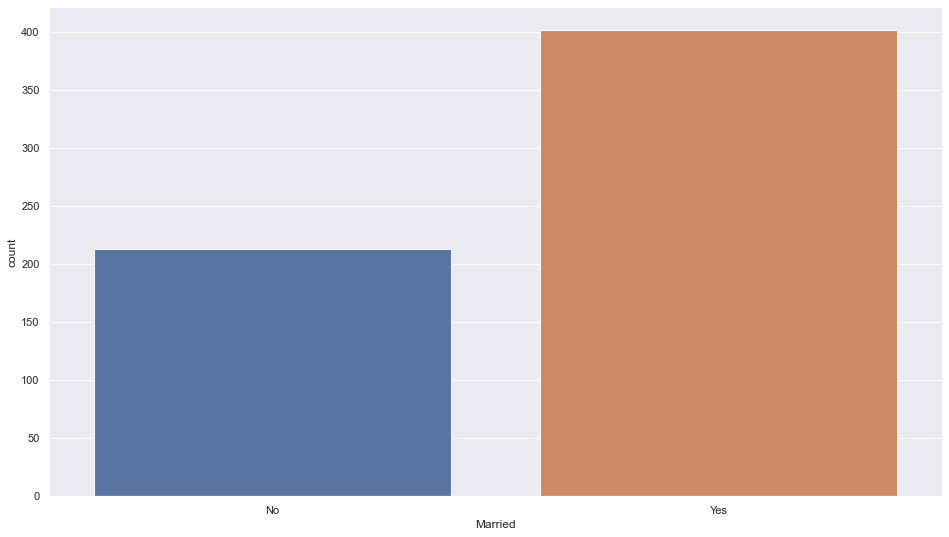

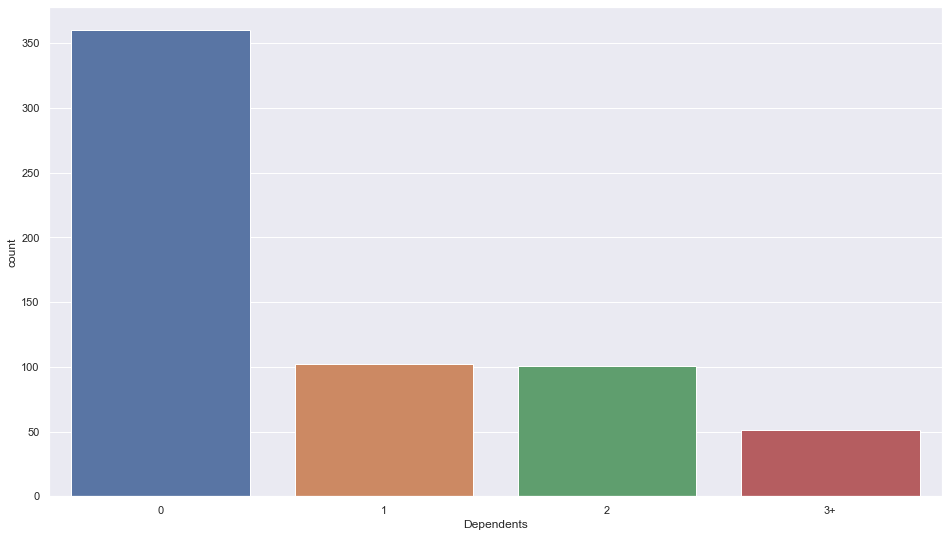

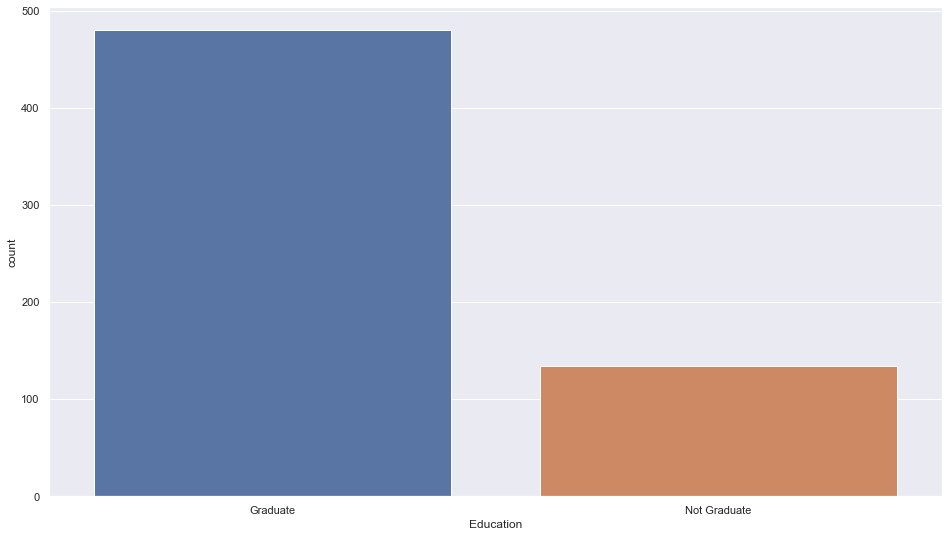

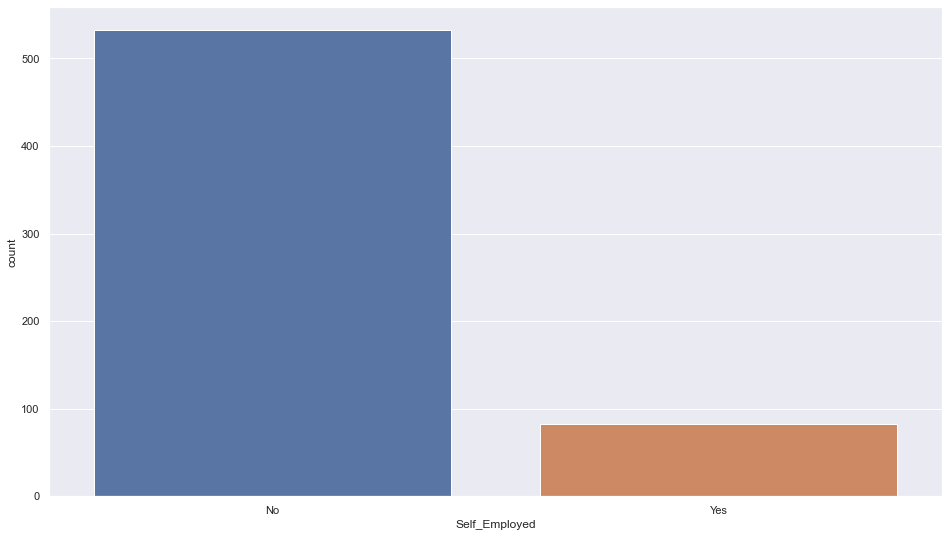

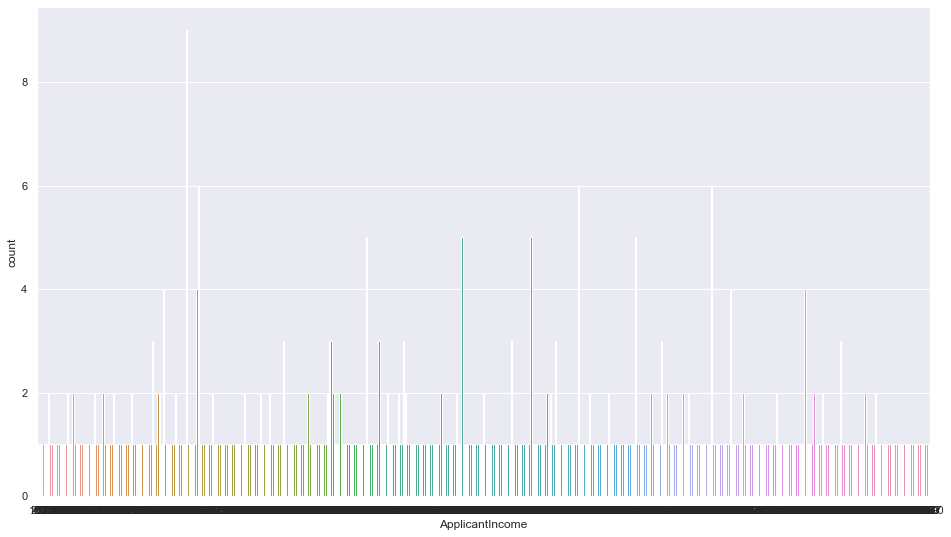

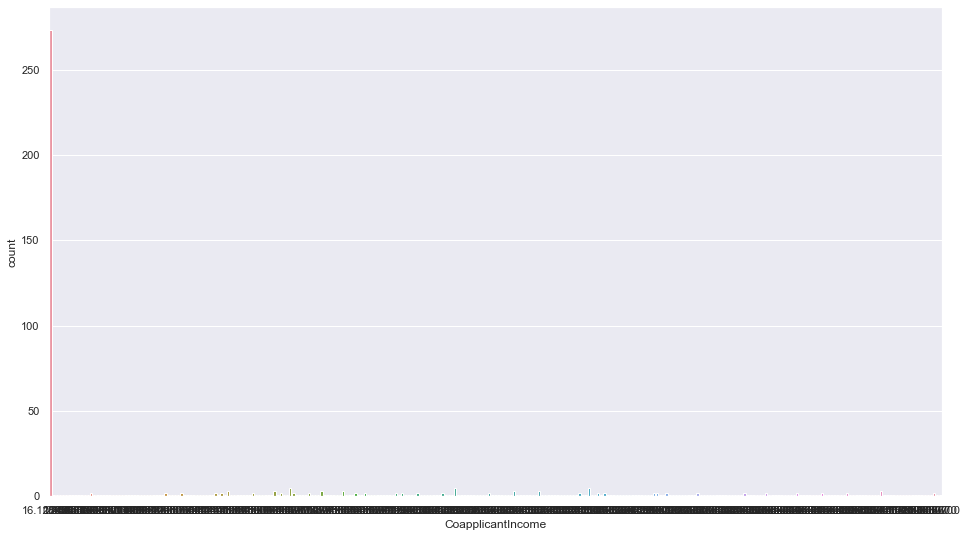

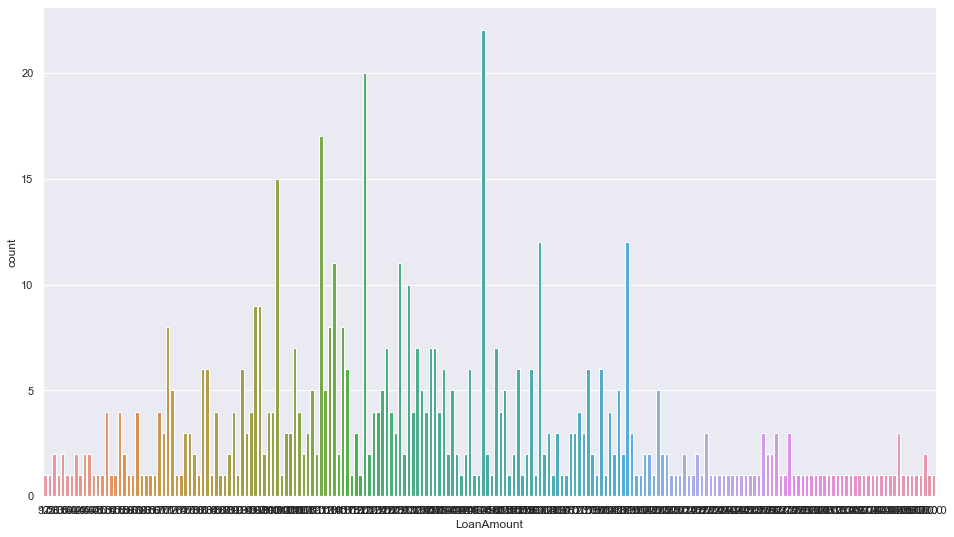

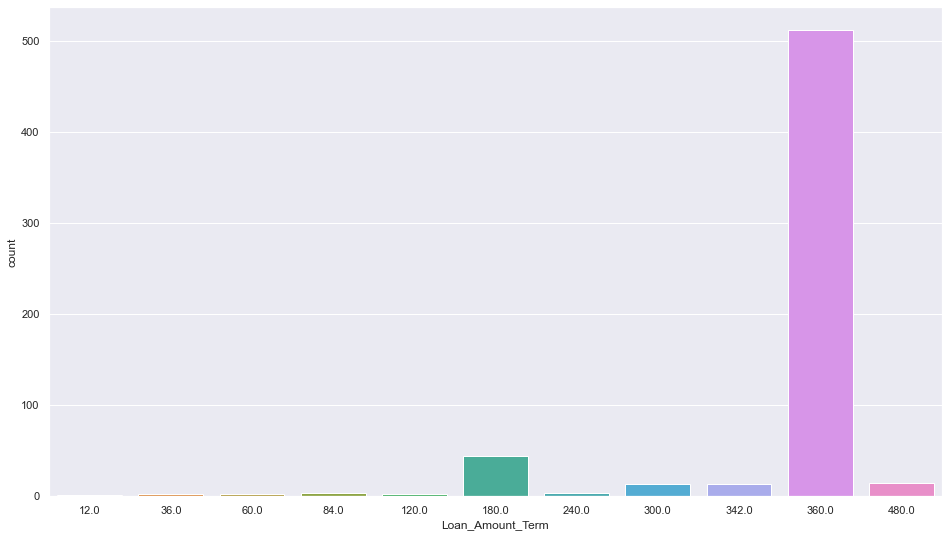

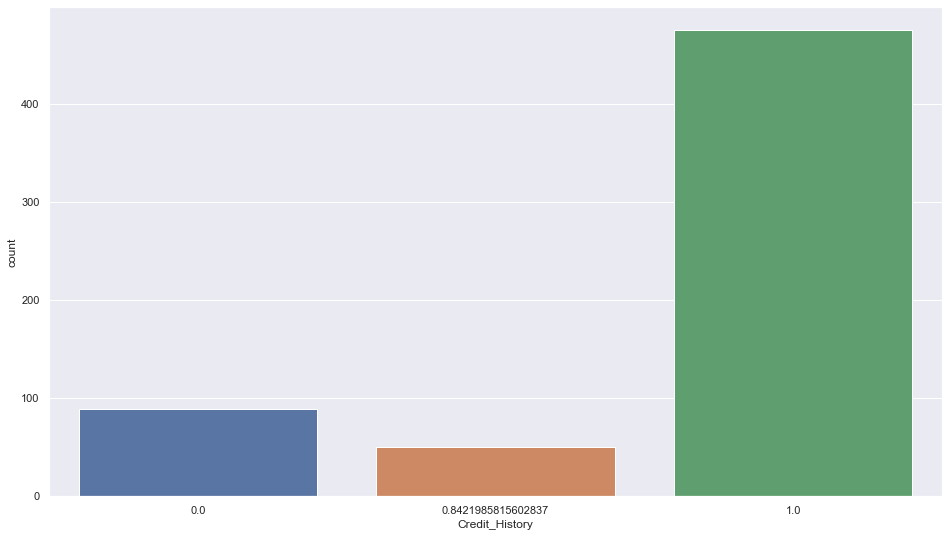

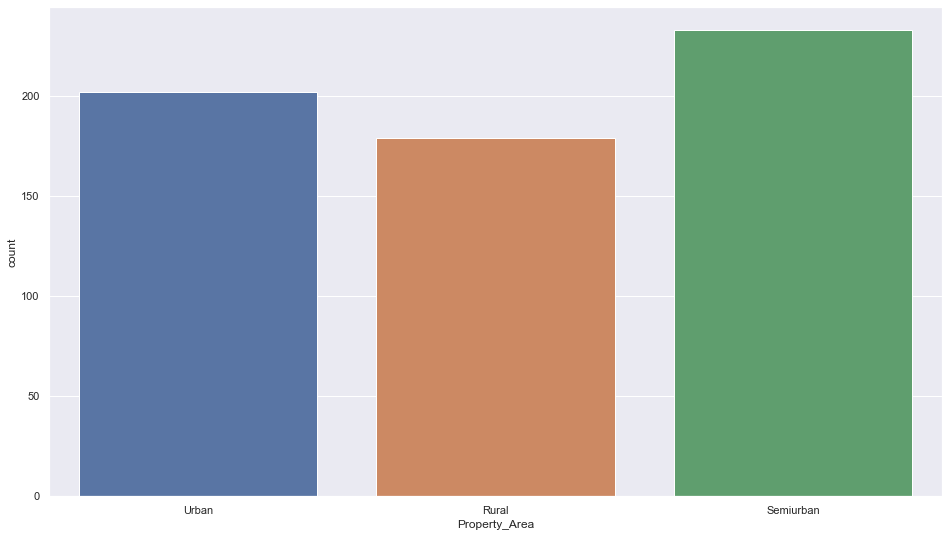

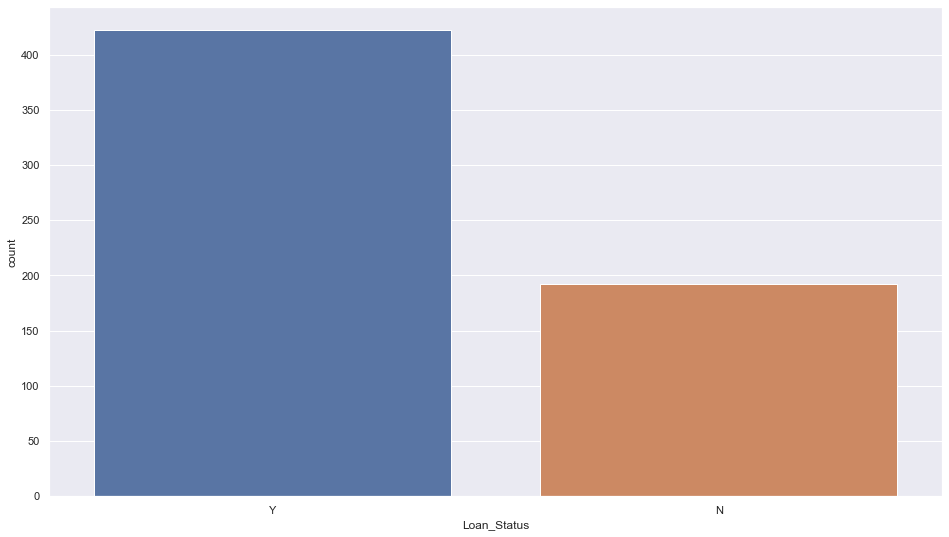

In [68]:
for i,feature in enumerate(df.columns):
    plt.figure(figsize=(16,9))
   # plt.subplot(4,5,i+1)
    sns.countplot(df[feature]) # only for categorical datatypes

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

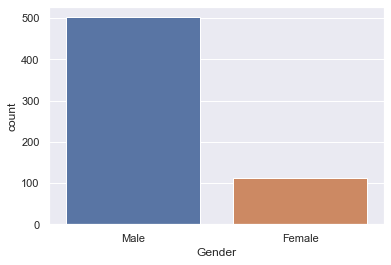

In [72]:
sns.countplot(df['Gender'])

## Numerical Attributes visualization

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

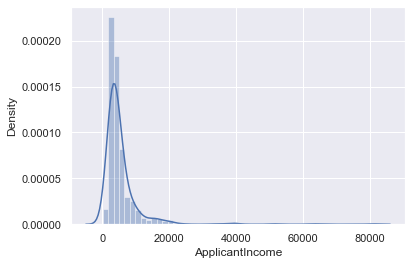

In [74]:
sns.distplot(df['ApplicantIncome'])

In [75]:
## Apply log transformation to the attribute
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

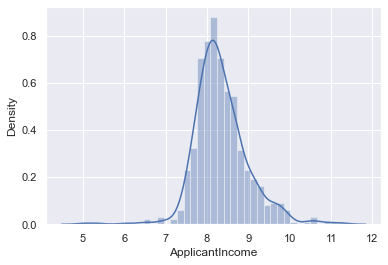

In [76]:
sns.distplot(df['ApplicantIncome'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

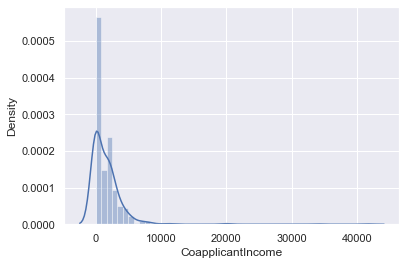

In [77]:
sns.distplot(df['CoapplicantIncome'])

In [78]:
## Apply log transformation to the feature

In [83]:
df['CoapplicantIncome']= np.log(df['CoapplicantIncome'])

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

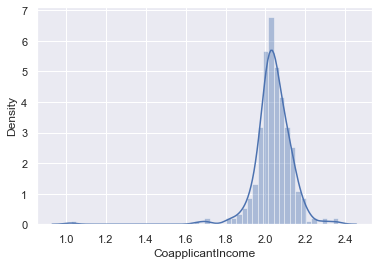

In [85]:
sns.distplot(df['CoapplicantIncome'])

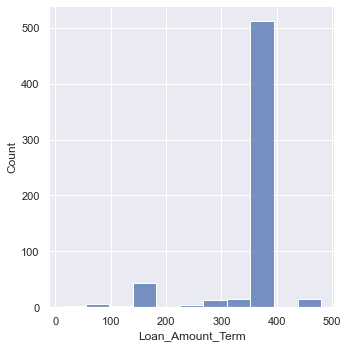

In [86]:
sns.displot(df['Loan_Amount_Term'])

In [87]:
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

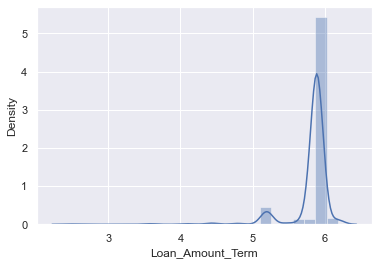

In [89]:
sns.distplot(df['Loan_Amount_Term'])

In [90]:
## Creating anew attributes
df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [91]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,8.674026,NaN,146.412162,5.886104,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1.990411,128.000000,5.886104,1.0,Rural,N,10.420520
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,NaN,66.000000,5.886104,1.0,Urban,Y,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2.049700,120.000000,5.886104,1.0,Urban,Y,9.906407
4,LP001008,Male,No,0,Graduate,No,8.699515,NaN,141.000000,5.886104,1.0,Urban,Y,NaN
